<a href="https://colab.research.google.com/github/BungPeerapat/Python_AI_Learn/blob/main/Training_Object_Detection_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Set Runtime : GPU

# Training a Object Detection Model with a Custom Dataset

The pipeline

1.   Getting data
2.   Preparing Dataset
3.   Creating Model
4.   Training Model
5.   Evaluation
6.   Convert Tensorflow .pb to TensorFlow Lite's
7.   Upload TensorFlow Lite's and Classes name
8.   Download Application





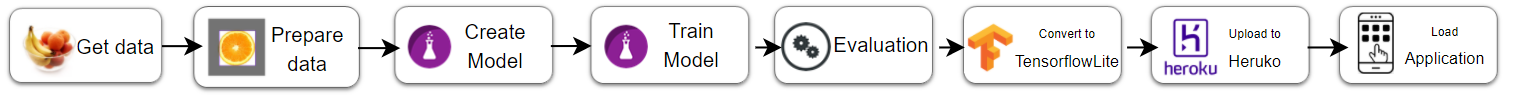

# 1. Get data
ทำการเตรียมข้อมูลสำหรับสร้างแบบจำลอง Object Detection
โดยเริ่มจากการรวบรวมรูปได้ 2 วิธี คือ รวบรวมรูปภาพเอง (Raw data) กับ ใช้รูปภาพจาก Open Source
หลังจากรวบรวมรูป จะต้องทำการระบุชื่อวัตถุที่สนใจและระบุตำแหน่งของวัตถุ

**ตัวอย่าง Open Source ที่มีรูปภาพสำหรับการทำ Object detection**

[roboflow.com](https://roboflow.com/)

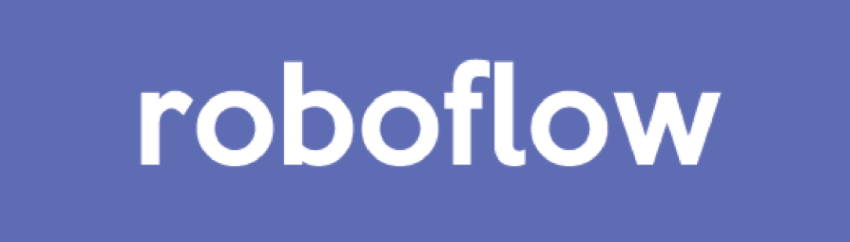




[Open Image Dataset](https://storage.googleapis.com/openimages/web/index.html)

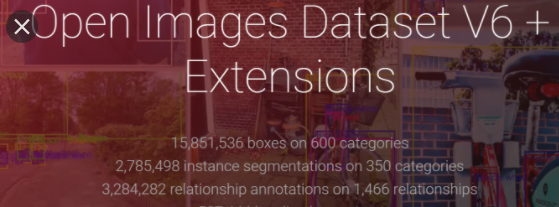

**ในบทความนี้ จะใช้ตัวอย่างรูปภาพของผลไม้ 4 ชนิด** ได้แก่


1.   Apple
2.   Banana
3.   Orange
4.   Strawberry 

ซึ่งรวบรูปข้อมูลมาจาก Open Image Dataset
สามารถศึกษาวิธีการโหลดข้อมูล ตามลิ้งค์นี้ : 

https://drive.google.com/file/d/1vi7T27yh1McVWRAqdTRV-tUujsqezskc/view?usp=sharing





#2. Preparing Dataset
สามารถเข้าใช้ [Roboflow](https://roboflow.com/) สำหรับเตรียมข้อมูลรูปภาพก่อนนำไปสร้างแบบจำลอง

2.1 Image Annotation

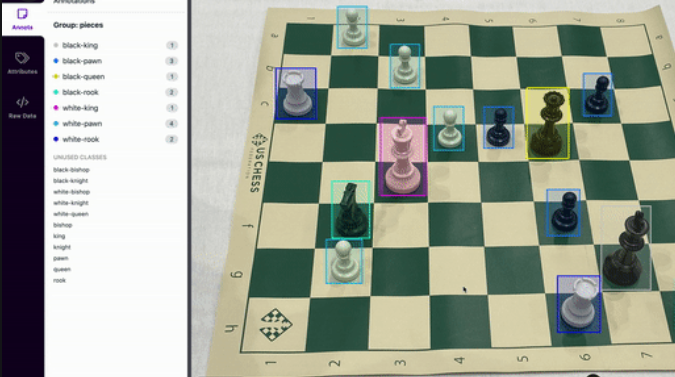


2.2 Data Augmentation

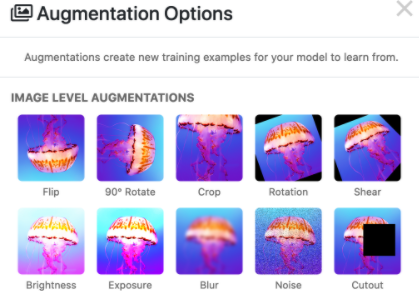



ขั้นตอนการเตรียมข้อมูลโดย Roboflow ทำได้ดังนี้

1. **Sign in** ที่ https://roboflow.com/

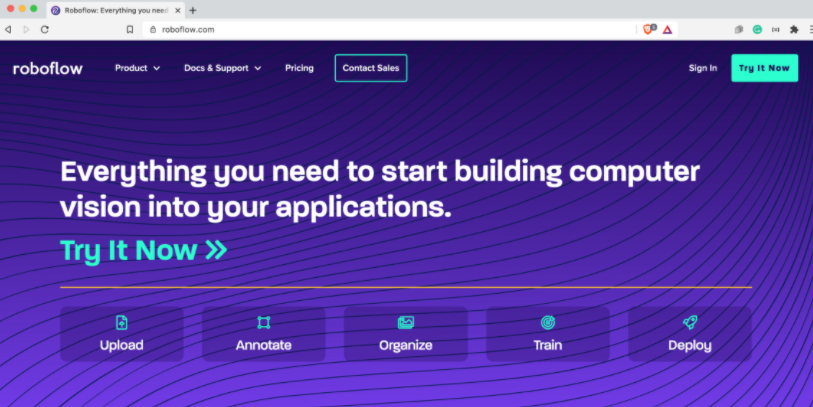

2. Create Dataset ใหม่

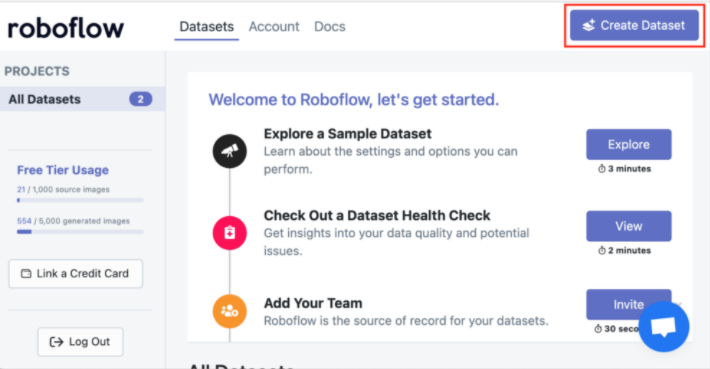

3. Upload images

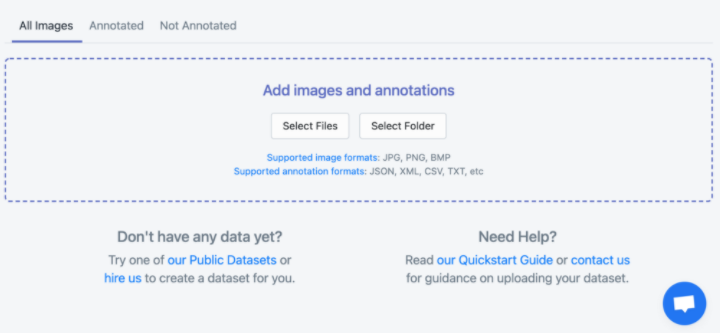

4. Add Augmentation Step 

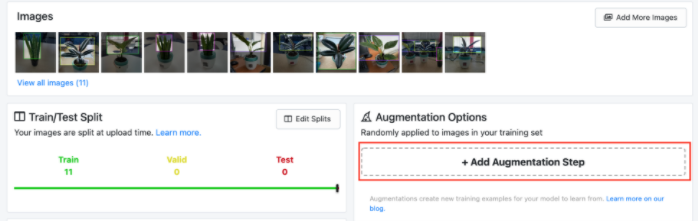

5. Generate format 

![](https://i.imgur.com/ZwMdcbY.png)

In [2]:
# Downloading dataset ในรูปแบบ tfrecord files โดยจะมีทั้งชุด train / validation / test 
# UPDATE THIS LINK - ให้ใส่ link ของชุดข้อมูลที่ได้จาก Roboflow

# สร้าง dataset directory    
%mkdir /content/train/
# เปลี่ยน directory
%cd /content/train/
# roboflow API
!curl -L "https://app.roboflow.com/ds/duO2ymssfG?key=2ns3U3m8OX" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

mkdir: cannot create directory ‘/content/train/’: File exists
/content/train
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   891  100   891    0     0    521      0  0:00:01  0:00:01 --:--:--   521
100 1039k  100 1039k    0     0   549k      0  0:00:01  0:00:01 --:--:--  193M
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/fruits.tfrecord    
 extracting: test/fruits_label_map.pbtxt  
   creating: train/
 extracting: train/fruits.tfrecord   
 extracting: train/fruits_label_map.pbtxt  
   creating: valid/
 extracting: valid/fruits.tfrecord   
 extracting: valid/fruits_label_map.pbtxt  


In [4]:
# Downloading test images from Roboflow
# สำหรับกรณีต้องการ test โมเดลจากไฟล์ format COCO json
%mkdir /content/test/
%cd /content/test/
!curl -L "https://app.roboflow.com/ds/JKqdDiKcUl?key=vbSKrKqLBd" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

mkdir: cannot create directory ‘/content/test/’: File exists
/content/test
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   887  100   887    0     0   1863      0 --:--:-- --:--:-- --:--:--  1863
100 1068k  100 1068k    0     0  1692k      0 --:--:-- --:--:-- --:--:-- 1692k
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/92a86c1b57b33528_jpg.rf.fcc38d66bcff7880319de4680b4d6ab5.jpg  
 extracting: test/_annotations.coco.json  
 extracting: test/dd12f7f02c92f410_jpg.rf.d4fd3ef7a88d23ecaf9a0856ebb29f5b.jpg  
   creating: train/
 extracting: train/12ed62ffd809397e_jpg.rf.1781ab1fd42234104584fcd869c1f546.jpg  
 extracting: train/12ed62ffd809397e_jpg.rf.4dc7c70f441c91728976e8ff7f5e8597.jpg  
 extracting: train/1a1b7ffe60d0539c_jpg.rf.99b4ca08c94ac0a07d6ca1ceae61f94d.jpg  
 extracting: train/1a1b7ffe60d0539c_jpg.rf.d1231d643bc3a08

# 3. Creating Model
สำหรับโมเดลที่จะใช้ train based `MobileNetSSDv2` model with the TensorFlow Object Detection API

เนื่องจากต้องการโหลด model ไปรันบน Application จึงต้องใช้โครงสร้างที่เล็ก - lightweight

Note: [tensorflow-object-detection-model](https://blog.roboflow.ai/training-a-tensorflow-object-detection-model-with-a-custom-dataset/)


## 3.1 Clone the `tensorflow-object-detection` repository

In [5]:
%cd /content
!git clone https://github.com/roboflow-ai/tensorflow-object-detection-faster-rcnn

/content
Cloning into 'tensorflow-object-detection-faster-rcnn'...
remote: Enumerating objects: 885, done.
remote: Total 885 (delta 0), reused 0 (delta 0), pack-reused 885
Receiving objects: 100% (885/885), 24.83 MiB | 33.73 MiB/s, done.
Resolving deltas: 100% (428/428), done.


## 3.2 Install TensorFlow object detection library

In [6]:
%cd /content
# Clone repository with state-of-the-art (SOTA) models and modeling solutions for TensorFlow users
!git clone https://github.com/tensorflow/models.git

!pip install tf_slim
!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk # ดาวน์โหลดและติดตั้ง
!pip install -q Cython contextlib2 pillow lxml matplotlib
!pip install -q pycocotools
!pip install tf-models-official
!pip install lvis

%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=. # Protobuf Compiler

import os
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'

!python object_detection/builders/model_builder_test.py

/content
Cloning into 'models'...
remote: Enumerating objects: 52924, done.
remote: Total 52924 (delta 0), reused 0 (delta 0), pack-reused 52924
Receiving objects: 100% (52924/52924), 569.32 MiB | 35.29 MiB/s, done.
Resolving deltas: 100% (36248/36248), done.
     |████████████████████████████████| 358kB 7.0MB/s 
Selecting previously unselected package python-bs4.
(Reading database ... 160975 files and directories currently installed.)
Preparing to unpack .../0-python-bs4_4.6.0-1_all.deb ...
Unpacking python-bs4 (4.6.0-1) ...
Selecting previously unselected package python-pkg-resources.
Preparing to unpack .../1-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-chardet.
Preparing to unpack .../2-python-chardet_3.0.4-1_all.deb ...
Unpacking python-chardet (3.0.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11

## 3.3 Configure training pipeline and Hyperparameters

*   Pretrained model จาก [Tensorflow detection model zoo: 
COCO-trained models](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf1_detection_zoo.md)

*   Pipline config files in [object_detection/samples/configs/](https://github.com/tensorflow/models/tree/master/research/object_detection/samples/configs)

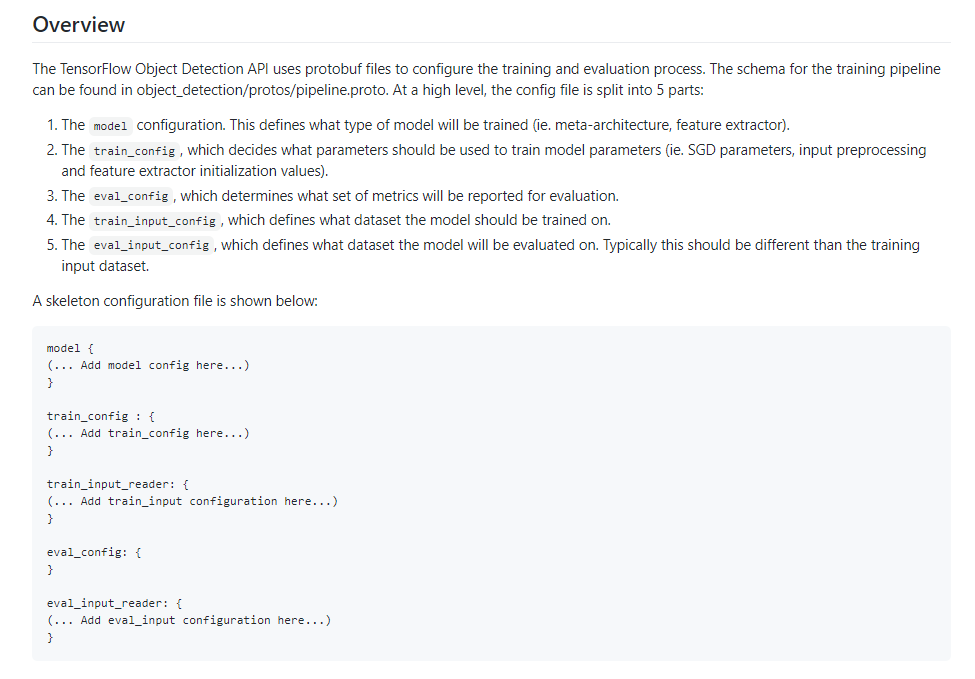

https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/configuring_jobs.md

In [9]:
# use TF 1.x for Object Detection APIs as they are not ported to TF 2.0 yet
%tensorflow_version 1.x

In [10]:
# 1. กำหนดจำนวนรอบในการเรียนรู้ของโมเดล (training steps) e.g. training steps = 1000 จะใช้เวลาในการเรียนรู้เสร็จเร็ว แต่หากเพิ่มจำนวนรอบมากขึ้นจะใช้เวลานานขึ้นและ accuracy จะมากขึ้น
num_steps = 1000  # 100000 to improve

# 2. กำหนดจำนวนรอบในการประเมินผล (evaluation steps)
num_eval_steps = 50

# 3. model configs จาก Model Zoo github: 
# https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf1_detection_zoo.md
MODELS_CONFIG = {
    'ssd_mobilenet_v2': {
        'model_name': 'ssd_mobilenet_v2_coco_2018_03_29',
        'pipeline_file': 'ssd_mobilenet_v2_coco.config',
        'batch_size': 12
    },
    'faster_rcnn_inception_v2': {
        'model_name': 'faster_rcnn_inception_v2_coco_2018_01_28',
        'pipeline_file': 'faster_rcnn_inception_v2_pets.config',
        'batch_size': 12
    },
    'rfcn_resnet101': {
        'model_name': 'rfcn_resnet101_coco_2018_01_28',
        'pipeline_file': 'rfcn_resnet101_pets.config',
        'batch_size': 8
    },    
}

# เลือก model จาก `MODELS_CONFIG`.
selected_model = 'ssd_mobilenet_v2'

# object detection model
MODEL = MODELS_CONFIG[selected_model]['model_name']

# pipline file in tensorflow object detection API.
pipeline_file = MODELS_CONFIG[selected_model]['pipeline_file']

# training batch size fits 
batch_size = MODELS_CONFIG[selected_model]['batch_size']

## 3.4 Prepare `tfrecord` files
เนื่องจากเราใช้ TFRecord file ที่เป็น dataset ที่ต้องการ จึงต้องเตรียมข้อมูลลงใน data folder

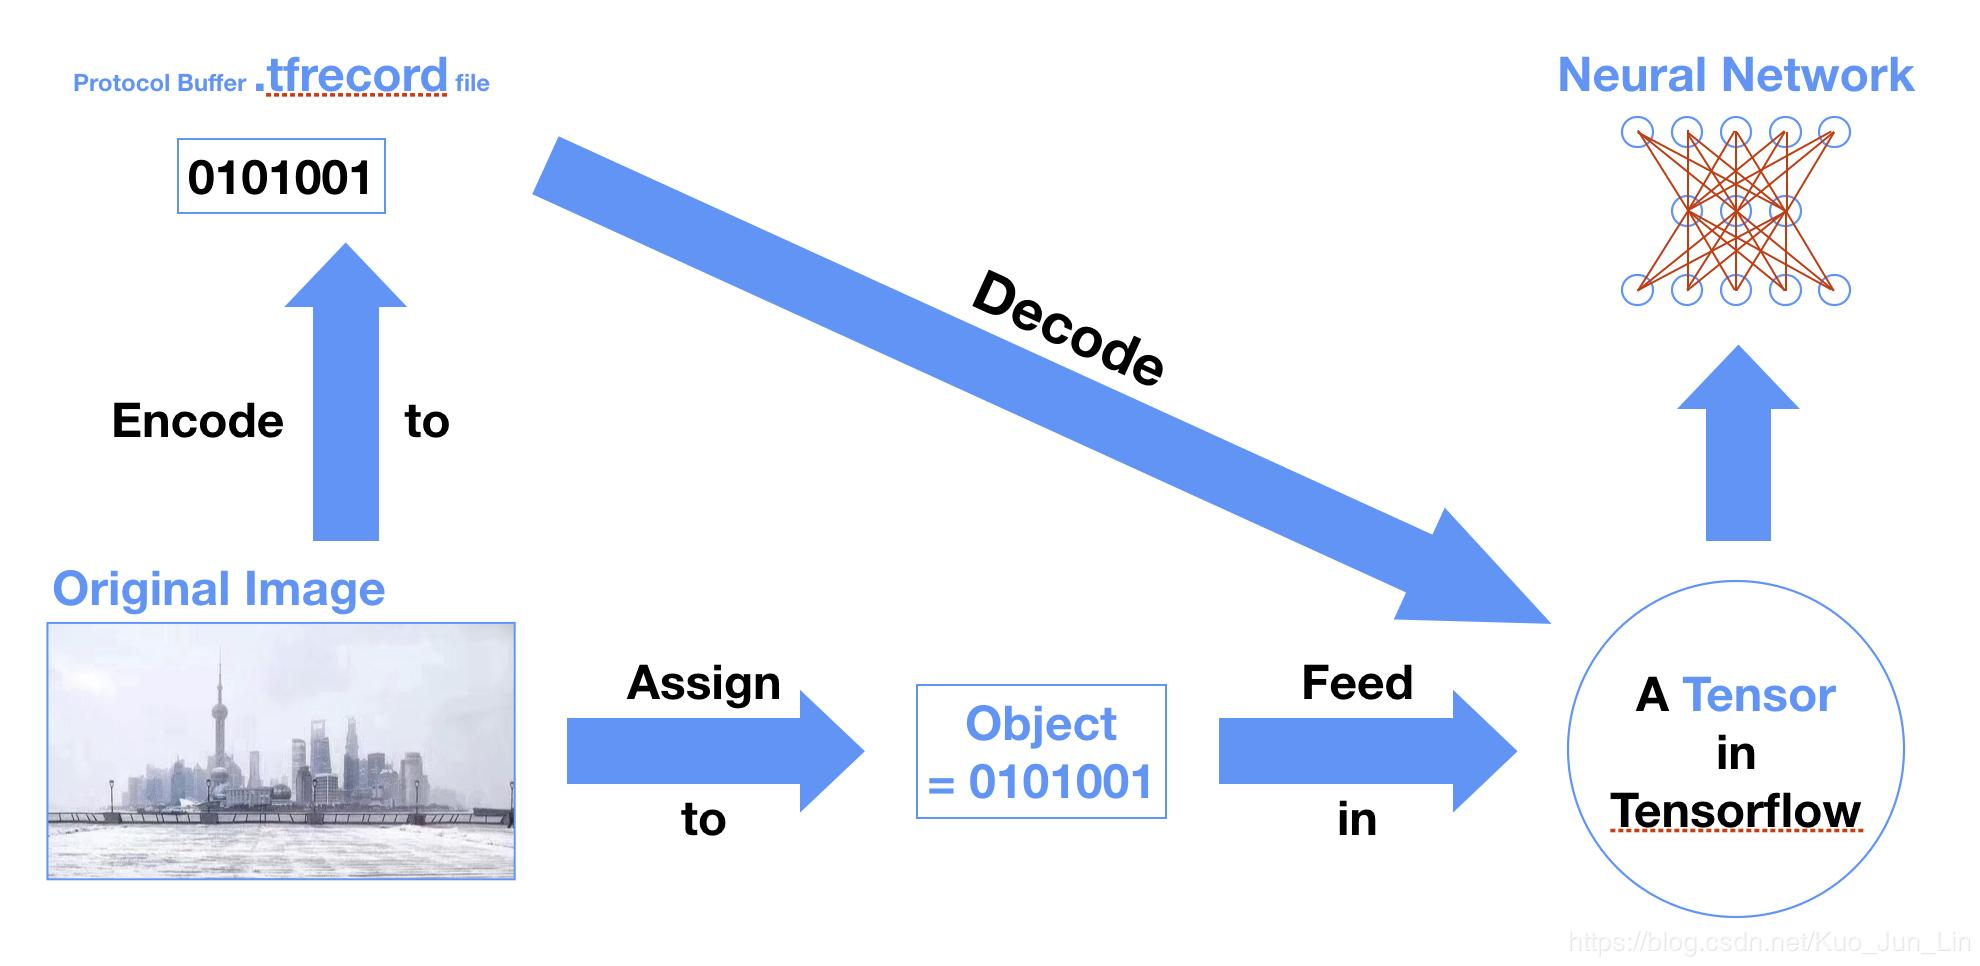

In [11]:
%cd /content/tensorflow-object-detection-faster-rcnn/data

# Copy โฟลเดอร์ชุดข้อมูล Train และ Test จากที่ drive ไปยังโฟลเดอร์ชุดข้อมูลของ Tensorflow Object Detection API
!cp -r /content/train/train/ /content/tensorflow-object-detection-faster-rcnn/data/
!cp -r /content/train/test/ /content/tensorflow-object-detection-faster-rcnn/data/

/content/tensorflow-object-detection-faster-rcnn/data


In [12]:
# training set
%ls train

fruits_label_map.pbtxt  fruits.tfrecord


In [13]:
# test set
%ls test

fruits_label_map.pbtxt  fruits.tfrecord


In [14]:
# Update these TFRecord names from "fruits" and "fruits_label_map"
test_record_fname = '/content/tensorflow-object-detection-faster-rcnn/data/test/fruits.tfrecord'
train_record_fname = '/content/tensorflow-object-detection-faster-rcnn/data/train/fruits.tfrecord'
label_map_pbtxt_fname = '/content/tensorflow-object-detection-faster-rcnn/data/train/fruits_label_map.pbtxt'

## 3.5 Download base model

In [15]:
%cd /content/models/research

import os
import shutil
import glob
import urllib.request
import tarfile

MODEL_FILE = MODEL + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'
DEST_DIR = '/content/models/research/pretrained_model'

if not (os.path.exists(MODEL_FILE)):
    urllib.request.urlretrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

tar = tarfile.open(MODEL_FILE)
tar.extractall()
tar.close()

os.remove(MODEL_FILE)
if (os.path.exists(DEST_DIR)):
    shutil.rmtree(DEST_DIR)
os.rename(MODEL, DEST_DIR)

/content/models/research


In [16]:
!echo {DEST_DIR}
!ls -alh {DEST_DIR}

/content/models/research/pretrained_model
total 135M
drwxr-xr-x  3 345018 89939 4.0K Mar 30  2018 .
drwxr-xr-x 24 root   root  4.0K Mar  5 16:58 ..
-rw-r--r--  1 345018 89939   77 Mar 30  2018 checkpoint
-rw-r--r--  1 345018 89939  67M Mar 30  2018 frozen_inference_graph.pb
-rw-r--r--  1 345018 89939  65M Mar 30  2018 model.ckpt.data-00000-of-00001
-rw-r--r--  1 345018 89939  15K Mar 30  2018 model.ckpt.index
-rw-r--r--  1 345018 89939 3.4M Mar 30  2018 model.ckpt.meta
-rw-r--r--  1 345018 89939 4.2K Mar 30  2018 pipeline.config
drwxr-xr-x  3 345018 89939 4.0K Mar 30  2018 saved_model


In [17]:
# Pre-trained Model ของเรา (.ckpt)
fine_tune_checkpoint = os.path.join(DEST_DIR, "model.ckpt")
fine_tune_checkpoint

'/content/models/research/pretrained_model/model.ckpt'

## 3.6 Train Config

In [18]:
import os
pipeline_fname = os.path.join('/content/models/research/object_detection/samples/configs/', pipeline_file)

assert os.path.isfile(pipeline_fname), '`{}` not exist'.format(pipeline_fname)

In [19]:
# ฟังก์ชันอ่านไฟล์ pbtxt เพื่อนับจำนวนคลาส
def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())

In [20]:
import re

# training pipeline file defines:
# - pretrain model path
# - the train/test sets
# - ID to Label mapping and number of classes
# - training batch size
# - epochs to trains
# - learning rate

num_classes = get_num_classes(label_map_pbtxt_fname)
with open(pipeline_fname) as f:
    s = f.read()
with open(pipeline_fname, 'w') as f:
    
    # fine_tune_checkpoint
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)
    
    # tfrecord files train and test.
    s = re.sub(
        '(input_path: ".*?)(train.record)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(val.record)(.*?")', 'input_path: "{}"'.format(test_record_fname), s)

    # label_map_path
    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # Set training batch_size.
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)

    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)
    
    # Set number of classes num_classes.
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)
    f.write(s)

In [21]:
!cat {pipeline_fname}

# SSD with Mobilenet v2 configuration for MSCOCO Dataset.
# Users should configure the fine_tune_checkpoint field in the train config as
# well as the label_map_path and input_path fields in the train_input_reader and
# eval_input_reader. Search for "PATH_TO_BE_CONFIGURED" to find the fields that
# should be configured.

model {
  ssd {
    num_classes: 4
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    anchor_generator {
      ssd_anchor_generator {
        num_layers: 6
        min_scale: 0.2
        max_scale: 0.95
        aspect_ratios: 1.0
        aspect_ratios: 2.0
        aspect_

## 3.7 (Optional) Run Tensorboard

**Tensorboard**
เครื่องมือแสดงผลการเรียนรู้ เป็น Open Source ทั่ใช้งานได้เมื่อทำงานบน TensorFlow ในเรื่องของ Deep Neural Network


*   สร้างกราฟหน้า Visualization ที่แสดงเกี่ยวกับการทำงานภายในของโมเดล ตั้งแต่การเทรน Deep Learning, Metrics, Gradient เป็นต้น

* สามารถติดตามเมตริกต่างๆเช่นความแม่นยำและการสูญเสียบันทึกในการฝึกอบรมหรือชุดการตรวจสอบความถูกต้อง


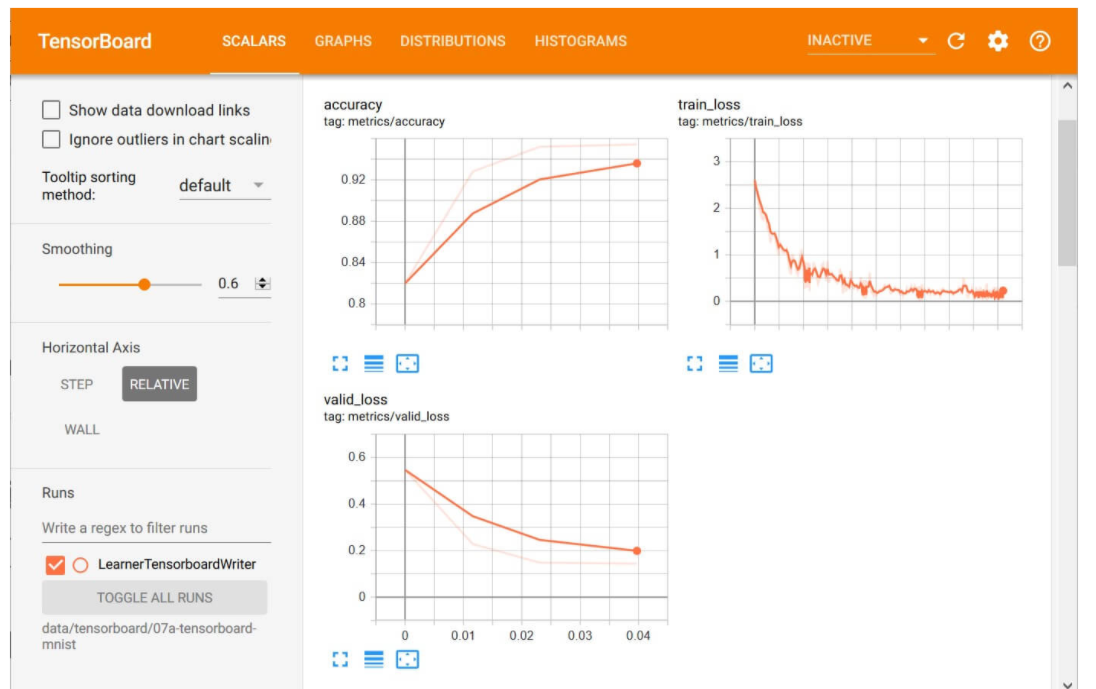

In [23]:
# ติดตั้ง
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip

--2021-03-05 17:06:44--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.214.112.203, 3.225.66.3, 52.203.100.2, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.214.112.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.13M  18.7MB/s    in 0.7s    

2021-03-05 17:06:45 (18.7 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [24]:
model_dir = 'training/' # เก็บ Checkpoint เก็บไว้ใน training/
LOG_DIR = model_dir     # LOG_DIR ให้ใส่ตำแหน่งของ training ลงไป

get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [25]:
get_ipython().system_raw('./ngrok http 6006 &')

In [26]:
# Get Tensorboard URL link
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://17eff759deef.ngrok.io


# 4. Train the model

In [27]:
!python /content/models/research/object_detection/model_main.py \
    --pipeline_config_path={pipeline_fname} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --num_eval_steps={num_eval_steps}

W0305 17:07:30.598253 140122205198208 model_lib.py:813] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting train_steps: 1000
I0305 17:07:30.598461 140122205198208 config_util.py:552] Maybe overwriting train_steps: 1000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0305 17:07:30.598553 140122205198208 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: 1
I0305 17:07:30.598640 140122205198208 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: 1
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0305 17:07:30.598724 140122205198208 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0305 17:07:30.598825 140122205198208 model_lib.py:829] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
INFO:tensorflow:create_estimator_and_inputs: use_tpu False, export_to_t

In [ ]:
!ls {model_dir}

checkpoint
eval_0
events.out.tfevents.1614190518.61d7aba93cb6
export
graph.pbtxt
model.ckpt-39549.data-00000-of-00001
model.ckpt-39549.index
model.ckpt-39549.meta
model.ckpt-42354.data-00000-of-00001
model.ckpt-42354.index
model.ckpt-42354.meta
model.ckpt-45160.data-00000-of-00001
model.ckpt-45160.index
model.ckpt-45160.meta
model.ckpt-47961.data-00000-of-00001
model.ckpt-47961.index
model.ckpt-47961.meta
model.ckpt-50000.data-00000-of-00001
model.ckpt-50000.index
model.ckpt-50000.meta


กราฟด้านซ้ายวัดผล mAP (IoU=0.50) และกราฟด้านขวาวัดผล mAP (IoU=0.75)

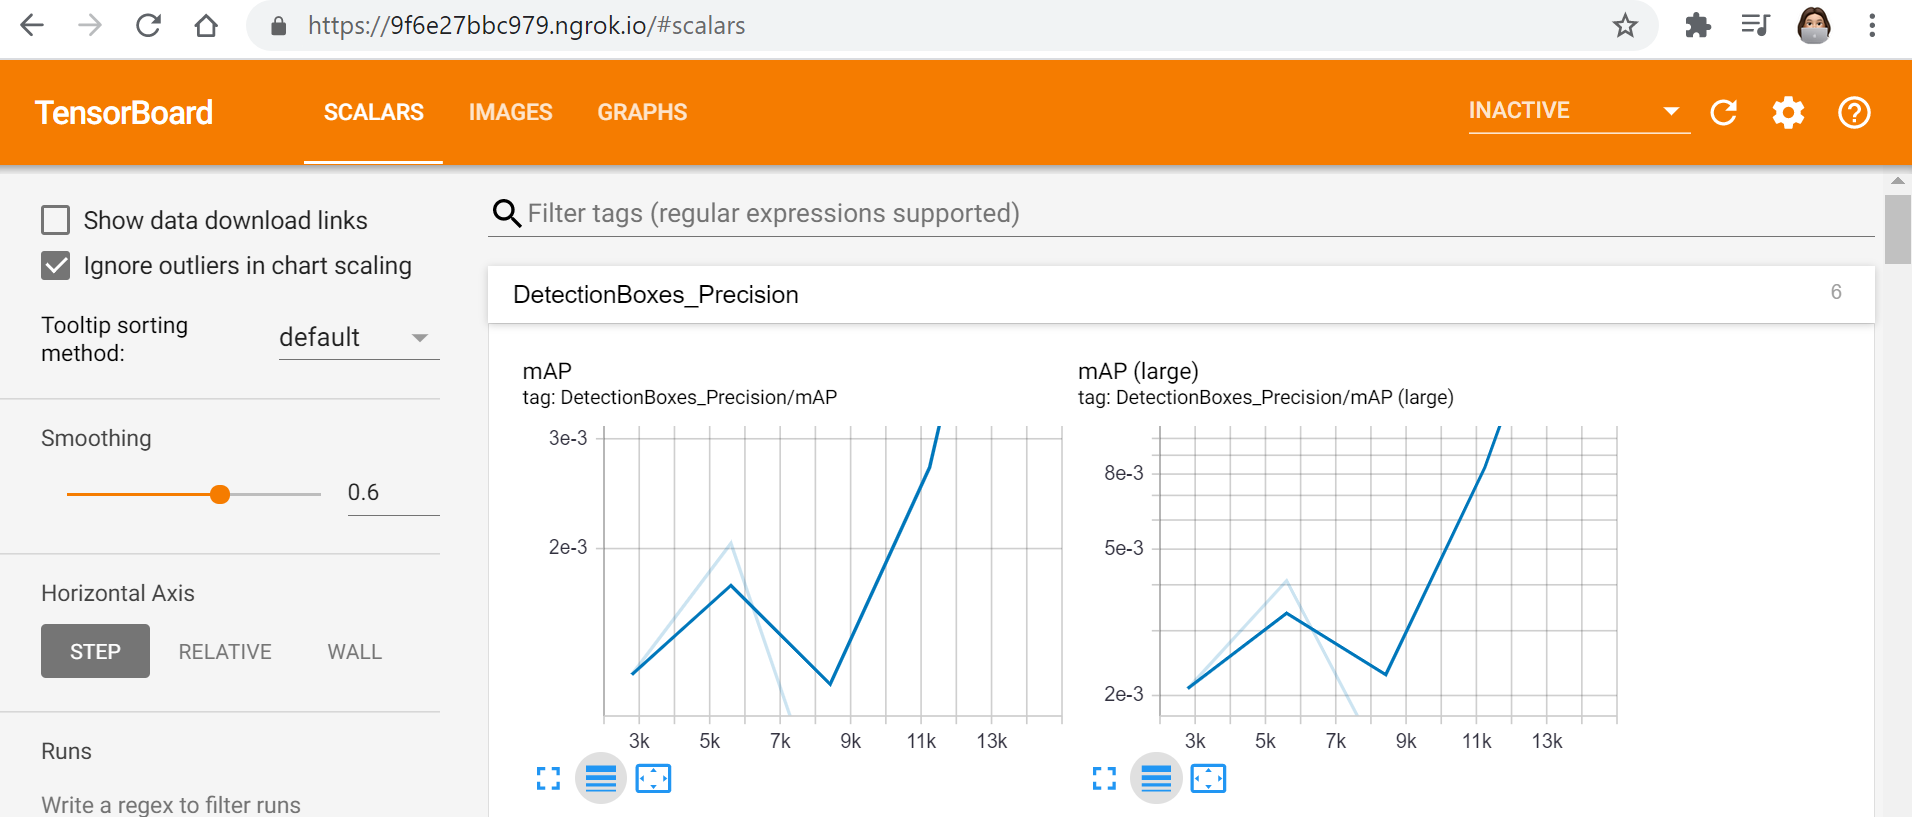

## 4.1 Export Trained model's .pb


In [36]:
%cd /content/models/research

import re
import numpy as np

output_directory = './fine_tuned_model'
tflite_directory = './fine_tuned_model/tflite'

lst = os.listdir(model_dir)
lst = [l for l in lst if 'model.ckpt-' in l and '.meta' in l]
steps=np.array([int(re.findall('\d+', l)[0]) for l in lst])
last_model = lst[steps.argmax()].replace('.meta', '')

last_model_path = os.path.join(model_dir, last_model)
print(last_model_path)
!python /content/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path={pipeline_fname} \
    --output_directory={output_directory} \
    --trained_checkpoint_prefix={last_model_path}
!python /content/models/research/object_detection/export_tflite_ssd_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path={pipeline_fname} \
    --output_directory={tflite_directory} \
    --trained_checkpoint_prefix={last_model_path}

/content/models/research
training/model.ckpt-1000
Instructions for updating:
Please use `layer.__call__` method instead.
W0305 17:24:30.089324 140712527374208 deprecation.py:323] From /usr/local/lib/python3.7/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0305 17:24:32.125883 140712527374208 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0305 17:24:32.163708 140712527374208 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0305 17:24:32.199393 140712527374208 convolutional_box_predictor.py:156] depth of additional conv before box predicto

In [37]:
!ls {output_directory}

checkpoint			model.ckpt.index  saved_model
frozen_inference_graph.pb	model.ckpt.meta   tflite
model.ckpt.data-00000-of-00001	pipeline.config


## 4.2 Download and save the model `.pb` file

In [38]:
import os

pb_fname = os.path.join(os.path.abspath(output_directory), "frozen_inference_graph.pb")
print(pb_fname)
assert os.path.isfile(pb_fname), '`{}` not exist'.format(pb_fname)

/content/models/research/fine_tuned_model/frozen_inference_graph.pb


In [39]:
%ls /content/models/research/fine_tuned_model/tflite

tflite_graph.pb  tflite_graph.pbtxt


In [40]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
# Change the final TFLite destination here
!cp /content/models/research/fine_tuned_model/frozen_inference_graph.pb "/content/drive/MyDrive/Computer Vision Object Detection/object_detection_Part1"
!cp /content/tensorflow-object-detection-faster-rcnn/data/train/fruits_label_map.pbtxt "/content/drive/MyDrive/Computer Vision Object Detection/object_detection_Part1"

# 5. Evaluation
Test with images in repository `tensorflow-object-detection/test` directory.

**To test with your own images, you need to place your images inside the `test` directory in this Colab notebook!** More on this below.

In [46]:
# Copy โฟลเดอร์ชุดข้อมูล Test จากที่ drive ไปยัง Tensorflow Object Detection API
!cp -r /content/test/test/ /content/tensorflow-object-detection-faster-rcnn/

In [47]:
import os
import glob

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = pb_fname

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = label_map_pbtxt_fname

# If you want to test the code with your images, just add images files to the PATH_TO_TEST_IMAGES_DIR.
PATH_TO_TEST_IMAGES_DIR =  os.path.join("/content/test/", "test")

assert os.path.isfile(pb_fname)
assert os.path.isfile(PATH_TO_LABELS)
TEST_IMAGE_PATHS = glob.glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, "*.*"))
assert len(TEST_IMAGE_PATHS) > 0, 'No image found in `{}`.'.format(PATH_TO_TEST_IMAGES_DIR)
print(TEST_IMAGE_PATHS)

['/content/test/test/92a86c1b57b33528_jpg.rf.fcc38d66bcff7880319de4680b4d6ab5.jpg', '/content/test/test/dd12f7f02c92f410_jpg.rf.d4fd3ef7a88d23ecaf9a0856ebb29f5b.jpg']


In [48]:
!ls /content/tensorflow-object-detection-faster-rcnn/

data			    requirements.txt
deploy			    resize_images.py
generate_tfrecord.py	    tensorflow_object_detection_training_colab.ipynb
LICENSE			    test
local_inference_test.ipynb  Tutorial_Faster_RCNN.ipynb
local_inference_test.py     Tutorial_Mobilenet.ipynb
README.md		    xml_to_csv.py


In [49]:
%cd /content/models/research/object_detection

import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops


# This is needed to display the images.
%matplotlib inline


from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util

/content/models/research/object_detection


In [52]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')


label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=num_classes, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)


def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {
                output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(
                    tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(
                    tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(
                    tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [
                                           real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [
                                           real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: np.expand_dims(image, 0)})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(
                output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[
                'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict

0 /content/test/test/92a86c1b57b33528_jpg.rf.fcc38d66bcff7880319de4680b4d6ab5.jpg
1 /content/test/test/dd12f7f02c92f410_jpg.rf.d4fd3ef7a88d23ecaf9a0856ebb29f5b.jpg


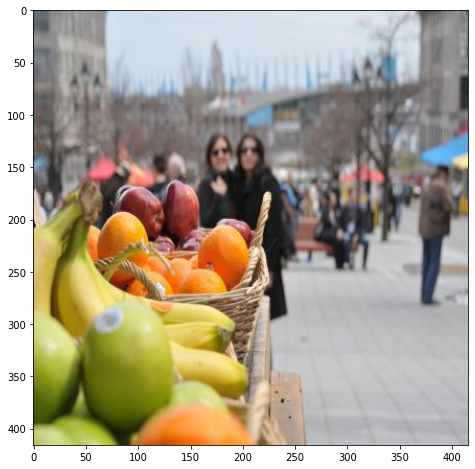

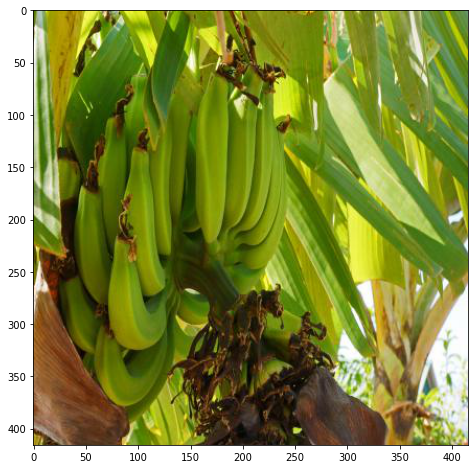

In [53]:
# Output images not showing? Run this cell again, and try the cell above
# This is needed to display the images.
%matplotlib inline

# Limited displayed images to 5 to reduce memory
count = 4
for i, image_path in enumerate(TEST_IMAGE_PATHS):
    if i > count:
        break
    print(i, image_path)
    image = Image.open(image_path)
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    output_dict = run_inference_for_single_image(image_np, detection_graph)
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=8)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)

## หลังจากทำการ train ไปทั้งหมด 50000 Step แล้วทำการทดสอบบางรูป ได้ผลลัพธ์ดังด้านล่างนี้

In [ ]:
# Output images not showing? Run this cell again, and try the cell above
# This is needed to display the images.
%matplotlib inline

# Limited displayed images to 5 to reduce memory
count = 4
for i, image_path in enumerate(TEST_IMAGE_PATHS):
    if i > count:
        break
    print(i, image_path)
    image = Image.open(image_path)
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    output_dict = run_inference_for_single_image(image_np, detection_graph)
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=8)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)

# 6. Convert Tensorflow .pb to TensorFlow Lite's

With our model trained, it's time to convert our graph to .tflite!

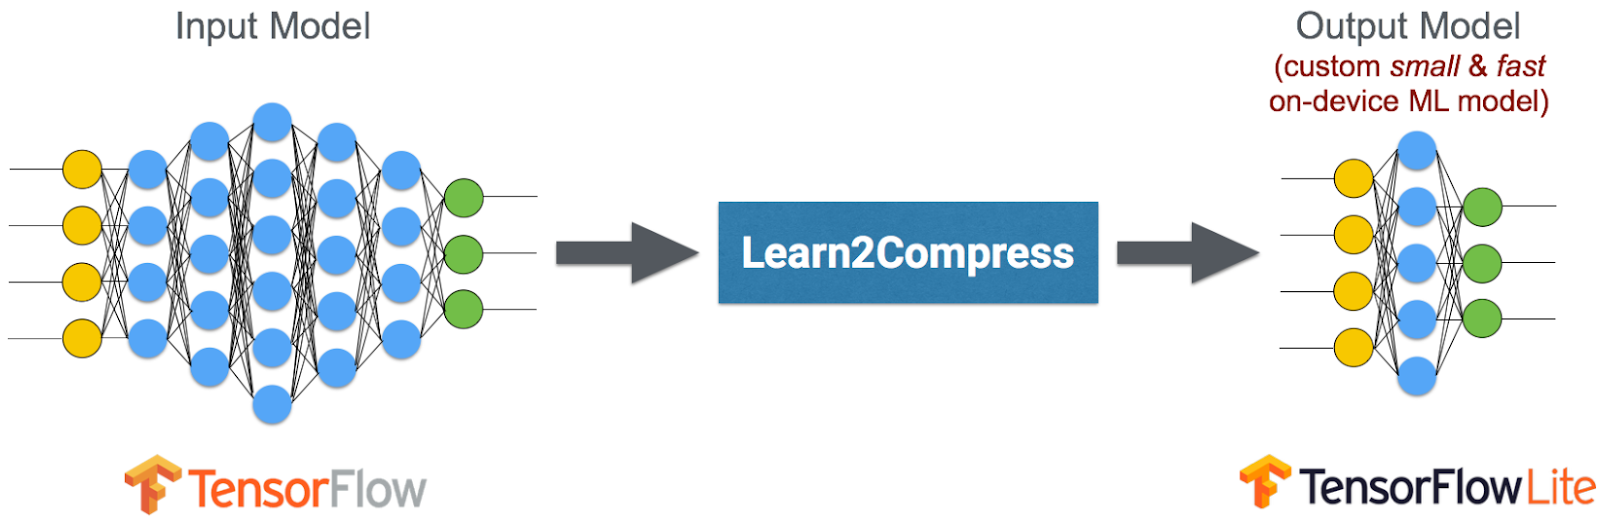

Learn2Compress for automatically generating on-device ML models.

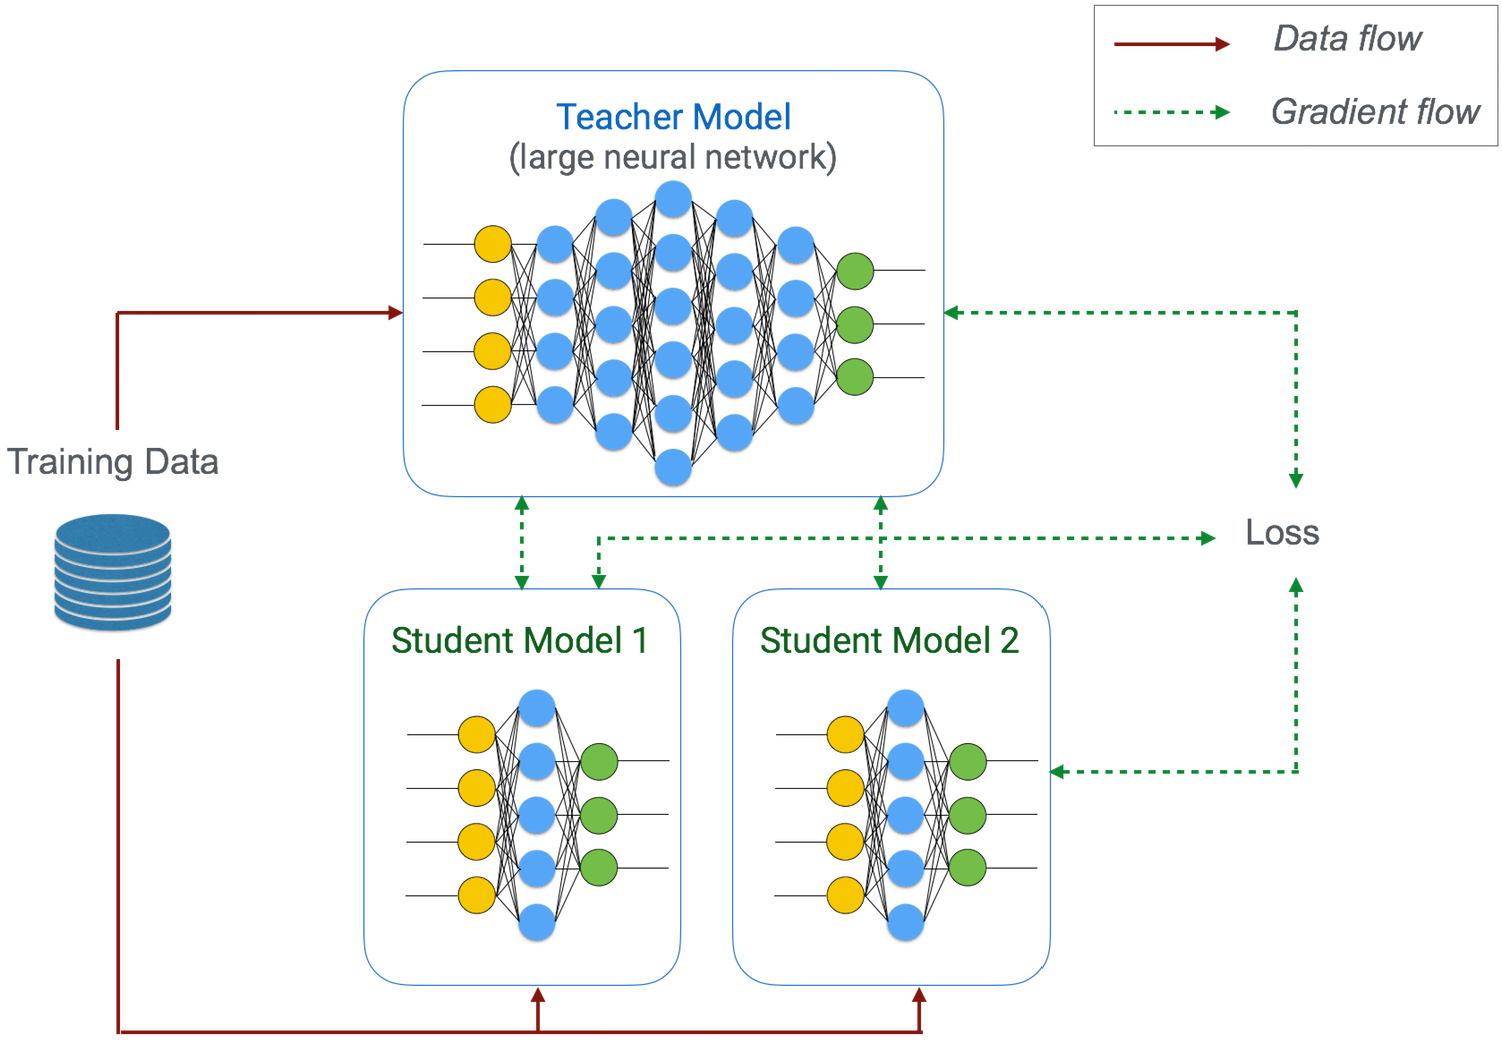

Joint training and distillation approach to learn compact student models.

In [55]:
%ls /content/models/research/fine_tuned_model/tflite

tflite_graph.pb  tflite_graph.pbtxt


In [56]:
!tflite_convert \
  --input_shape=1,300,300,3 \
  --input_arrays=normalized_input_image_tensor \
  --output_arrays=TFLite_Detection_PostProcess,TFLite_Detection_PostProcess:1,TFLite_Detection_PostProcess:2,TFLite_Detection_PostProcess:3 \
  --allow_custom_ops \
  --graph_def_file=/content/models/research/fine_tuned_model/tflite/tflite_graph.pb \
  --output_file="/content/models/research/fine_tuned_model/final_model.tflite"

2021-03-05 17:33:26.201205: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-03-05 17:33:26.206745: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-03-05 17:33:26.207290: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2021-03-05 17:33:26.207545: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-03-05 17:33:26.209154: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-03-05 17:33:26.211180: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2021-

Save your model to your drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [57]:
# Change the final TFLite destination here
!cp /content/models/research/fine_tuned_model/final_model.tflite "/content/drive/MyDrive/Computer Vision Object Detection/object_detection_Part2/Model"